In [344]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise import Dataset
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import seaborn as sns
# A reader is still needed but only the rating_scale param is requiered.

In [244]:
movies_df =pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df =pd.read_csv('data/ml-latest-small/ratings.csv')
links_df =pd.read_csv('data/ml-latest-small/links.csv')
tags_df =pd.read_csv('data/ml-latest-small/tags.csv')

In [245]:
movies_df['year'] =movies_df.title.apply(lambda x: x [-5:-1] if  x[-5].strip() in ['1','2'] else None)

In [246]:
movie_rat_df = ratings_df.merge(movies_df)

In [247]:
movie_rat_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'year'], dtype='object')

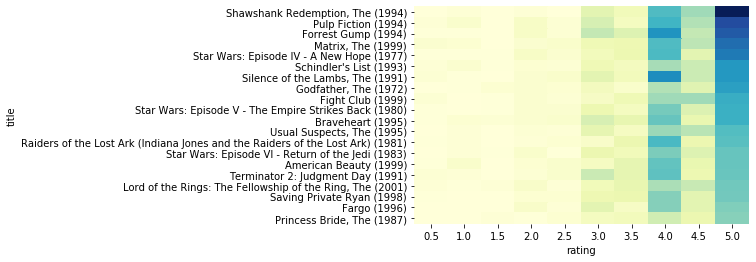

In [351]:
sns.heatmap(pd.crosstab(movie_rat_df.title, movie_rat_df.rating).sort_values(5.0, ascending= False).head(20), 
            cmap="YlGnBu", cbar=False)


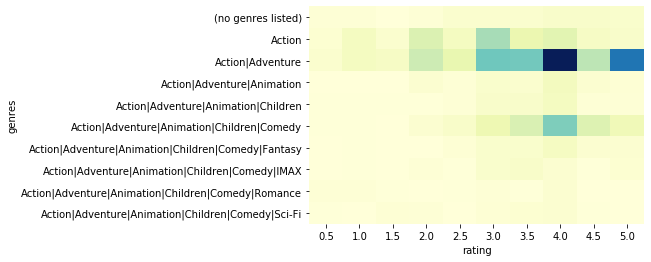

In [348]:
sns.heatmap(pd.crosstab(movie_rat_df.genres, movie_rat_df.rating).head(10),  cmap="YlGnBu", cbar=False)


In [257]:
pd.crosstab(movie_rat_df.genres, movie_rat_df.rating).sort_values(0.5,0, ascending = True).head(20)

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
genres,,,,,,,,,,
Adventure|Drama|Horror|Thriller,0,0,0,0,1,3,3,3,0,1
Animation|Comedy|Drama|Romance|Sci-Fi,0,0,0,0,0,2,1,2,3,2
Animation|Comedy|Fantasy|Musical,0,0,1,0,0,2,3,4,1,1
Animation|Comedy|Fantasy|Musical|Romance,0,0,0,1,6,6,13,14,2,2
Animation|Comedy|Fantasy|Sci-Fi,0,0,0,0,0,1,2,1,1,4
Animation|Comedy|Horror|IMAX,0,0,0,1,0,1,0,0,0,0
Animation|Comedy|Horror|Musical,0,0,0,1,0,0,0,0,0,0
Animation|Comedy|Romance,0,0,0,0,0,1,0,3,0,4
Animation|Comedy|Sci-Fi,0,0,0,0,2,3,2,9,3,4


In [261]:
import matplotlib.pyplot as plt

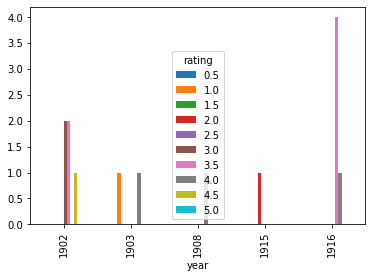

In [282]:
pd.crosstab( movie_rat_df.year, movie_rat_df.rating).head().plot(kind ='bar')

In [283]:
movie_rat_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'year'], dtype='object')

In [284]:
pd.crosstab(movie_rat_df.title, movie_rat_df.rating).columns

Float64Index([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='rating')

In [285]:
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.425008 , 1.4183872]),
 'test_mae': array([1.14078498, 1.1305395 ]),
 'fit_time': (0.07986903190612793, 0.10306572914123535),
 'test_time': (0.38434410095214844, 0.33881592750549316)}

In [286]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Load the movielens-100k dataset

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.8818
RMSE: 0.8783
RMSE: 0.8831


In [287]:
anti_set = data.build_full_trainset().build_anti_testset()

In [288]:
predictions = algo.test(anti_set)

    # Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True)

RMSE: 0.4564


0.4564490908370932

In [289]:
pred_df = pd.DataFrame(predictions)

In [290]:
pred_df.head()

,uid,iid,r_ui,est,details
0,1,318,3.501557,5.000000,{'was_impossible': False}
1,1,1704,3.501557,4.753518,{'was_impossible': False}
2,1,6874,3.501557,4.502012,{'was_impossible': False}
3,1,8798,3.501557,4.462193,{'was_impossible': False}
4,1,46970,3.501557,4.055634,{'was_impossible': False}


In [291]:
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')

In [292]:
m_df.head()

,movieId,title,genres,year,uid,iid,r_ui,est,details
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2,1,3.501557,3.973499,{'was_impossible': False}
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,1,3.501557,3.287599,{'was_impossible': False}
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4,1,3.501557,3.901927,{'was_impossible': False}
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,1,3.501557,3.663128,{'was_impossible': False}
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,1,3.501557,3.930683,{'was_impossible': False}


In [295]:
ratings_df[ratings_df.userId==2]['movieId'].unique()

array([   318,    333,   1704,   3578,   6874,   8798,  46970,  48516,
        58559,  60756,  68157,  71535,  74458,  77455,  79132,  80489,
        80906,  86345,  89774,  91529,  91658,  99114, 106782, 109487,
       112552, 114060, 115713, 122882, 131724])

In [302]:
ratings_df[ratings_df['userId'] ==1].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [312]:
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)

In [339]:
user_pred_df = pd.crosstab(m_df.year, m_df.est)

In [356]:
user_pred_df.sort_values(1.0, ascending = False).head()

est,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
year,,,,,,,,,
1997,35,332,2238,9160,35056,66950,36312,4702,172
2000,30,379,2375,10069,38242,71082,40245,5672,268
1995,30,353,2192,9469,35504,63447,34727,5261,254
1993,19,239,1541,6560,26030,49672,28504,4291,183
1994,18,291,1914,8447,33424,59260,31117,4533,270


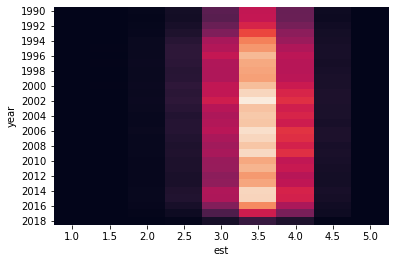

In [343]:
import seaborn as sns
sns.heatmap( user_pred_df.loc['1990':],  cbar=False)

In [303]:
m_df.head()

,movieId,title,genres,year,uid,iid,r_ui,est,details
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2,1,3.501557,3.973499,{'was_impossible': False}
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,1,3.501557,3.287599,{'was_impossible': False}
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4,1,3.501557,3.901927,{'was_impossible': False}
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,1,3.501557,3.663128,{'was_impossible': False}
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,1,3.501557,3.930683,{'was_impossible': False}


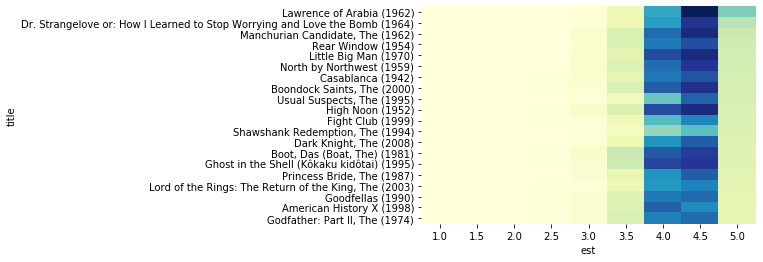

In [355]:
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

In [297]:
uid_1_df = m_df[m_df['uid'] ==1]
uid_1_df[uid_1_df ['est']<4].groupby('genres').count()[['uid']].sort_values('uid', ascending = False)

,uid
genres,
Comedy,202
Comedy|Romance,75
Drama,57
Horror,41
Horror|Thriller,38
Comedy|Drama|Romance,34
Drama|Romance,33
Children|Comedy,33
Drama|Thriller,29


In [298]:
uid_1_df[uid_1_df ['est']<4].groupby('genres').count()[['uid']].sort_values('uid', ascending = False)

,uid
genres,
Comedy,202
Comedy|Romance,75
Drama,57
Horror,41
Horror|Thriller,38
Comedy|Drama|Romance,34
Drama|Romance,33
Children|Comedy,33
Drama|Thriller,29


In [299]:
uid_1_df[uid_1_df ['est']>4].groupby('genres').count()[['uid']].sort_values('uid', ascending = False)

,uid
genres,
Drama,991
Comedy,732
Comedy|Drama,401
Documentary,328
Drama|Romance,313
Comedy|Romance,283
Comedy|Drama|Romance,241
Drama|Thriller,138
Crime|Drama,124


In [300]:
uid_2_df = m_df[m_df['uid'] ==2]
uid_2_df[uid_2_df ['est']<4].groupby('genres').count()[['uid']].sort_values('uid', ascending = False)

,uid
genres,
Drama,1015
Comedy,926
Comedy|Drama,425
Comedy|Romance,359
Drama|Romance,339
Documentary,333
Comedy|Drama|Romance,265
Horror,166
Drama|Thriller,163


In [301]:
uid_2_df[uid_2_df ['est']>4].groupby('genres').count()[['uid']].sort_values('uid', ascending = False)

,uid
genres,
Drama,33
Comedy,16
Crime|Drama,14
Comedy|Drama,10
Comedy|Drama|Romance,10
Drama|War,9
Drama|Romance,8
Action|Adventure|Sci-Fi,6
Crime|Drama|Thriller,5
